In [ ]:
import numpy as np
import tensorflow as tf
import requests
import pandas as pd
import urllib.request
import os
import PIL
from PIL import Image
from tensorflow import keras
from matplotlib import image
from matplotlib import pyplot
from os import listdir
import cv2
from skimage.transform import resize
import matplotlib.pyplot as plt
from skimage import color
from skimage import io # load all images in a directory
from sklearn.utils import shuffle
from skimage.color import rgb2gray
from tensorflow.keras import datasets, layers, models

In [ ]:
!git  clone https://github.com/ardamavi/Sign-Language-Digits-Dataset
!pip install Pillow

Cloning into 'Sign-Language-Digits-Dataset'...
remote: Enumerating objects: 2095, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 2095 (delta 2), reused 0 (delta 0), pack-reused 2089
Receiving objects: 100% (2095/2095), 15.07 MiB | 21.58 MiB/s, done.
Resolving deltas: 100% (660/660), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


(100, 100)
2062


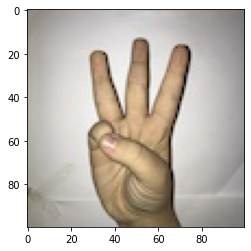

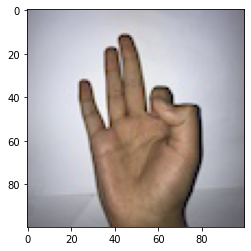

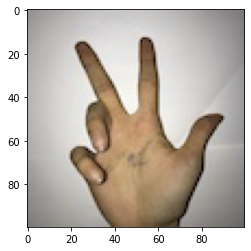

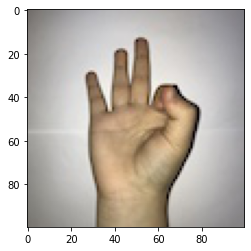

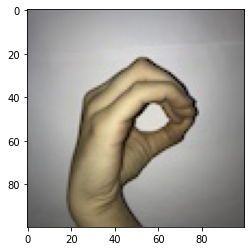

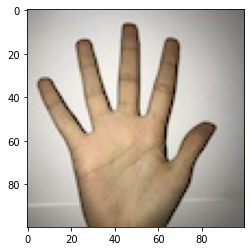

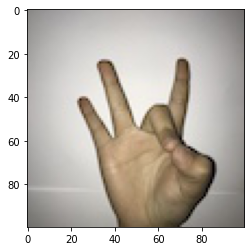

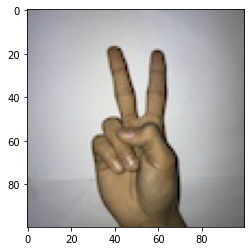

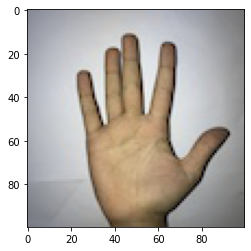

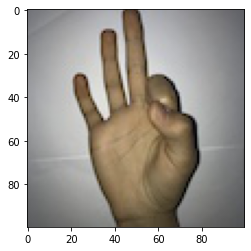

6
9
3
9
0
5
8
2
5
9
<class 'list'>


In [ ]:
images= []
output=[]
for x in range(0,10):
 for filename in listdir('/content/Sign-Language-Digits-Dataset/Dataset/'+str(x)):
  #load image
  img_data = Image.open('/content/Sign-Language-Digits-Dataset/Dataset/'+str(x)+'/' + filename)
  #setting output
  output.append(x);
  #store grey image
  img=Image.open('/content/Sign-Language-Digits-Dataset/Dataset/'+str(x)+'/' + filename)
  images.append(img)
images, output = shuffle(images, output, random_state=42) 
print(images[0].size)
print(len(images))
for i in range (10):
  plt.imshow(images[i])
  plt.show() 
for i in range (10):
  print(output[i])
print(type(images))

In [ ]:
#resize
new_images=[]
newsize = (100, 100)
for image in images:
  new_img=image.resize(newsize)
  new_images.append(new_img)
image_arrays = [np.array(image) for image in new_images]
new_images = np.stack(image_arrays, axis=0)
print(new_images.shape)
print(type(new_images))

(2062, 100, 100, 3)
<class 'numpy.ndarray'>


In [ ]:
import numpy as np

# Assume that we have a list of images stored in a NumPy array called `images`

# Initialize a list to store the sums of the pixels for each image
pixel_sums = []

# Iterate over each image in the list
for image in new_images:
  # Initialize a variable to store the sum of the pixels for this image
  pixel_sum = 0
  
  # Iterate over each pixel in the image
  for pixel in np.nditer(image):
    # Add the pixel value to the pixel sum
    pixel_sum += pixel
    
  # Append the pixel sum for this image to the list
  pixel_sums.append(pixel_sum)

# Now, `pixel_sums` contains the sum of the pixels for each image
total_sum = 0

# Iterate over the values in the list
for value in pixel_sums:
  # Add the value to the total sum
  total_sum += value

print(total_sum)
avg=total_sum/(100*100*2062*3)
print(avg)


10182675362
164.60839576462982


In [ ]:
new_images=np.subtract(new_images,avg)

In [ ]:

new_images=np.divide(new_images,255)


In [ ]:
split_1 = int(0.8 * len(new_images))
split_2 = int(0.8 * len(output))

np.stack(new_images, axis=0).astype('float32')
x_train = new_images[:split_1]#80 
x_train=np.array(x_train)
y_train = np.array(output[:split_2])
y_train=np.array(y_train).flatten()
x_test = np.array(new_images[split_1:])#20
x_test=np.array(x_test)
y_test =np.array(output[split_2:]).flatten() 

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

(1649, 100, 100, 3)
(1649,)
(413, 100, 100, 3)
(413,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
def model3():
  model = models.Sequential([
        keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(100,100,3)),
        keras.layers.MaxPool2D(4,4), 
        keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten() ,       
        keras.layers.Dense(50,activation='relu') ,        
        keras.layers.Dropout(rate=0.5) ,            
        keras.layers.Dense(10,activation='softmax')  
      ])

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  return model

In [ ]:
def model1():
  model = models.Sequential([
          layers.Flatten(input_shape=(100,100,3)),
          layers.Dense(3000, activation='relu'),
          layers.Dense(1000, activation='relu'),
          layers.Dense(10, activation='softmax')    
      ])

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  return model

In [ ]:
def model2():
  model = models.Sequential([
        keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(100,100,3)),
        keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten() ,    
        keras.layers.Dense(120,activation='relu') ,    
        keras.layers.Dense(100,activation='relu') ,    
        keras.layers.Dense(50,activation='relu') ,        
        keras.layers.Dropout(rate=0.5) ,            
        keras.layers.Dense(10,activation='softmax')  
      ])

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  return model

In [ ]:
from sklearn.model_selection import KFold
def kFold(model, x_train,y_train):
  kfold=KFold(n_splits=5)
  for x_train_ind,x_test_ind in kfold.split(x_train,y_train):
    x_train_set, y_train_set,x_test_set,y_test_set=x_train[x_train_ind],y_train[x_train_ind],x_train[x_test_ind],y_train[x_test_ind]
    model.fit(x_train_set,y_train_set,epochs=10)
    print("*************")
    #print(model.evaluate(x_test_set,y_test_set))
    testLoss, testAccuracy = model.evaluate(x_test_set,y_test_set, verbose=2)
    print('\ntest accuracy', testAccuracy)

In [ ]:
print("-------------------Evaluate Model 1-------------------")
model_1=model1()
kFold(model_1, x_train,y_train)

-------------------Evaluate Model 1-------------------
Epoch 1/10
42/42 [==============================] - 42s 967ms/step - loss: 3.3255 - accuracy: 0.4033
Epoch 2/10
42/42 [==============================] - 28s 677ms/step - loss: 0.6807 - accuracy: 0.7635
Epoch 3/10
42/42 [==============================] - 28s 673ms/step - loss: 0.3658 - accuracy: 0.8802
Epoch 4/10
42/42 [==============================] - 29s 691ms/step - loss: 0.2375 - accuracy: 0.9265
Epoch 5/10
42/42 [==============================] - 30s 726ms/step - loss: 0.1426 - accuracy: 0.9515
Epoch 6/10
42/42 [==============================] - 29s 701ms/step - loss: 0.0553 - accuracy: 0.9864
Epoch 7/10
42/42 [==============================] - 30s 705ms/step - loss: 0.0442 - accuracy: 0.9864
Epoch 8/10
42/42 [==============================] - 28s 674ms/step - loss: 0.0461 - accuracy: 0.9871
Epoch 9/10
42/42 [==============================] - 28s 676ms/step - loss: 0.0575 - accuracy: 0.9848
Epoch 10/10
42/42 [=================

In [ ]:
print("-------------------Evaluate Model 2-------------------")
model_2=model2()
kFold(model_1, x_train,y_train)

-------------------Evaluate Model 2-------------------
Epoch 1/10
42/42 [==============================] - 27s 646ms/step - loss: 0.0449 - accuracy: 0.9924
Epoch 2/10
42/42 [==============================] - 27s 643ms/step - loss: 0.0136 - accuracy: 0.9970
Epoch 3/10
42/42 [==============================] - 27s 639ms/step - loss: 0.0080 - accuracy: 0.9962
Epoch 4/10
42/42 [==============================] - 28s 663ms/step - loss: 0.0200 - accuracy: 0.9955
Epoch 5/10
42/42 [==============================] - 27s 639ms/step - loss: 0.0619 - accuracy: 0.9818
Epoch 6/10
42/42 [==============================] - 27s 639ms/step - loss: 0.0307 - accuracy: 0.9909
Epoch 7/10
42/42 [==============================] - 27s 642ms/step - loss: 0.0187 - accuracy: 0.9962
Epoch 8/10
42/42 [==============================] - 27s 639ms/step - loss: 5.9740e-04 - accuracy: 1.0000
Epoch 9/10
42/42 [==============================] - 28s 665ms/step - loss: 8.9721e-05 - accuracy: 1.0000
Epoch 10/10
42/42 [=========

In [ ]:
print("-------------------Evaluate Model 3-------------------")
model=model3()
kFold(model, x_train,y_train)

-------------------Evaluate Model 3-------------------
Epoch 1/10
42/42 [==============================] - 39s 895ms/step - loss: 2.1455 - accuracy: 0.2146
Epoch 2/10
42/42 [==============================] - 37s 890ms/step - loss: 1.6529 - accuracy: 0.4056
Epoch 3/10
42/42 [==============================] - 38s 912ms/step - loss: 1.3214 - accuracy: 0.5262
Epoch 4/10
42/42 [==============================] - 38s 892ms/step - loss: 1.0648 - accuracy: 0.6088
Epoch 5/10
42/42 [==============================] - 37s 891ms/step - loss: 0.9154 - accuracy: 0.6467
Epoch 6/10
42/42 [==============================] - 37s 889ms/step - loss: 0.8654 - accuracy: 0.6740
Epoch 7/10
42/42 [==============================] - 37s 890ms/step - loss: 0.7423 - accuracy: 0.7248
Epoch 8/10
42/42 [==============================] - 39s 920ms/step - loss: 0.7171 - accuracy: 0.7293
Epoch 9/10
42/42 [==============================] - 37s 891ms/step - loss: 0.5975 - accuracy: 0.7733
Epoch 10/10
42/42 [=================

In [ ]:
print(model_1.evaluate(x_test,y_test)) 

13/13 [==============================] - 4s 258ms/step - loss: 1.2705 - accuracy: 0.8644
[1.2704700231552124, 0.8644067645072937]


In [ ]:
x_test_reshaped = np.reshape(x_test, (-1, 100, 100, 3))
y_pred_1 = model_1.predict(x_test_reshaped)

13/13 [==============================] - 3s 214ms/step


In [ ]:
y_pred_2 = model_2.predict(x_test_reshaped) 

13/13 [==============================] - 41s 3s/step


In [ ]:
y_pred_3 = model.predict(x_test_reshaped) 

13/13 [==============================] - 3s 228ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

#Evaluate Model 1 
print("Calculating MSE and MAE of Model 1")
# Calculate the mean squared error
mse = mean_squared_error(y_test[:5], y_pred_1[:5])
print(f'MSE: {mse:.2f}')

# Calculate the mean absolute error
mae = mean_absolute_error(y_test[:5], y_pred_1[:5])
print(f'MAE: {mae:.2f}')

Calculating MSE and MAE of Model 1
MSE: 27.40
MAE: 4.60


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

#Evaluate Model 1 
print("Calculating MSE and MAE of Model 2")
# Calculate the mean squared error
mse = mean_squared_error(y_test[:5], y_pred_2[:5])
print(f'MSE: {mse:.2f}')

# Calculate the mean absolute error
mae = mean_absolute_error(y_test[:5], y_pred_2[:5])
print(f'MAE: {mae:.2f}')

Calculating MSE and MAE of Model 2
MSE: 26.83
MAE: 4.63


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

#Evaluate Model 3
print("Calculating MSE and MAE of Model 3 ")
# Calculate the mean squared error
mse = mean_squared_error(y_test[:5], y_pred_3[:5])
print(f'MSE: {mse:.2f}')

# Calculate the mean absolute error
mae = mean_absolute_error(y_test[:5], y_pred_3[:5])
print(f'MAE: {mae:.2f}')

Calculating MSE and MAE of Model 3 
MSE: 27.40
MAE: 4.60


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, classification_report
print("----------------Evaluate Model 1----------------")

y_pred_1 = np.argmax(y_pred_1, axis=1)

# Calculate precision, recall, and f-score for each class
precision, recall, fscore, support = precision_recall_fscore_support(y_test[:100], y_pred_1[:100], average=None)

confusion_mat = confusion_matrix(y_test[:100], y_pred_1[:100])
print("Confusion Matrix")
print(confusion_mat)
print("**************************")
print("Classification Report")
print(classification_report(y_test[:100], y_pred_1[:100]))

----------------Evaluate Model 1----------------
Confusion Matrix
[[ 8  1  0  0  0  0  0  0  0  0]
 [ 0  7  0  0  0  0  0  1  0  0]
 [ 0  0  9  0  0  0  0  0  0  0]
 [ 0  0  0  8  0  0  0  0  0  1]
 [ 0  0  0  0  8  0  0  2  0  0]
 [ 0  0  0  0  0  8  0  0  0  0]
 [ 0  0  0  0  1  0  7  1  0  0]
 [ 0  0  1  0  1  0  1  5  0  0]
 [ 0  0  0  0  2  0  1  0 15  0]
 [ 0  0  0  0  0  0  0  0  0 12]]
**************************
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.88      0.88      0.88         8
           2       0.90      1.00      0.95         9
           3       1.00      0.89      0.94         9
           4       0.67      0.80      0.73        10
           5       1.00      1.00      1.00         8
           6       0.78      0.78      0.78         9
           7       0.56      0.62      0.59         8
           8       1.00      0.83      0.91        18
           9 

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, classification_report
print("----------------Evaluate Model 2----------------")

y_pred_2 = np.argmax(y_pred_2, axis=1)

# Calculate precision, recall, and f-score for each class
precision, recall, fscore, support = precision_recall_fscore_support(y_test[:100], y_pred_2[:100], average=None)

confusion_mat = confusion_matrix(y_test[:100], y_pred_2[:100])
print("Confusion Matrix")
print(confusion_mat)
print("**************************")
print("Classification Report")
print(classification_report(y_test[:100], y_pred_1[:100]))

----------------Evaluate Model 2----------------
Confusion Matrix
[[ 9  0  0  0  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0]
 [ 7  0  0  0  2  0  0  0  0  0]
 [ 8  0  0  0  1  0  0  0  0  0]
 [ 9  0  0  0  1  0  0  0  0  0]
 [ 5  0  0  0  3  0  0  0  0  0]
 [ 8  0  0  0  1  0  0  0  0  0]
 [ 5  0  0  0  3  0  0  0  0  0]
 [15  0  0  0  3  0  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0]]
**************************
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.88      0.88      0.88         8
           2       0.90      1.00      0.95         9
           3       1.00      0.89      0.94         9
           4       0.67      0.80      0.73        10
           5       1.00      1.00      1.00         8
           6       0.78      0.78      0.78         9
           7       0.56      0.62      0.59         8
           8       1.00      0.83      0.91        18
           9 

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, classification_report
print("----------------Evaluate Model 3----------------")

y_pred_3 = np.argmax(y_pred_3, axis=1)

# Calculate precision, recall, and f-score for each class
precision, recall, fscore, support = precision_recall_fscore_support(y_test[:100], y_pred_2[:100], average=None)

confusion_mat = confusion_matrix(y_test[:100], y_pred_3[:100])
print("Confusion Matrix")
print(confusion_mat)
print("**************************")
print("Classification Report")
print(classification_report(y_test[:100], y_pred_3[:100]))

----------------Evaluate Model 3----------------
Confusion Matrix
[[ 9  0  0  0  0  0  0  0  0  0]
 [ 0  8  0  0  0  0  0  0  0  0]
 [ 0  0  9  0  0  0  0  0  0  0]
 [ 0  1  0  8  0  0  0  0  0  0]
 [ 0  0  0  0 10  0  0  0  0  0]
 [ 0  0  0  0  0  8  0  0  0  0]
 [ 0  0  0  0  1  0  8  0  0  0]
 [ 0  0  0  0  1  0  0  7  0  0]
 [ 0  0  0  0  1  0  1  0 16  0]
 [ 0  0  0  0  0  0  0  0  0 12]]
**************************
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.89      1.00      0.94         8
           2       1.00      1.00      1.00         9
           3       1.00      0.89      0.94         9
           4       0.77      1.00      0.87        10
           5       1.00      1.00      1.00         8
           6       0.89      0.89      0.89         9
           7       1.00      0.88      0.93         8
           8       1.00      0.89      0.94        18
           9 

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto') 
x_train = x_train.reshape(1649,3*100*100)
svc.fit(x_train, y_train)

SVC(gamma='auto', kernel='linear')

In [ ]:
from sklearn.metrics import accuracy_score
x_test = x_test.reshape(413,3*100*100)
y_pred_svm = svc.predict(x_test) 
print("Accuracy on unknown data is",accuracy_score(y_test,y_pred_svm))

Accuracy on unknown data is 0.8184019370460048


In [ ]:
from sklearn.metrics import precision_score, recall_score

precision, recall, fscore, support = precision_recall_fscore_support(y_test[:100], y_pred_svm[:100], average=None)

confusion_mat = confusion_matrix(y_test[:100], y_pred_svm[:100])
print("Confusion Matrix")
print(confusion_mat)
print("**************************")
print("Classification Report")
print(classification_report(y_test[:100], y_pred_svm[:100]))

Confusion Matrix
[[ 8  1  0  0  0  0  0  0  0  0]
 [ 1  7  0  0  0  0  0  0  0  0]
 [ 0  1  8  0  0  0  0  0  0  0]
 [ 0  0  2  6  0  0  0  0  0  1]
 [ 0  0  0  0  9  0  0  1  0  0]
 [ 0  0  0  0  0  8  0  0  0  0]
 [ 0  0  0  0  3  0  6  0  0  0]
 [ 0  0  1  0  2  0  0  5  0  0]
 [ 1  0  0  0  3  0  2  0 12  0]
 [ 1  0  0  0  0  0  0  0  1 10]]
**************************
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.78      0.88      0.82         8
           2       0.73      0.89      0.80         9
           3       1.00      0.67      0.80         9
           4       0.53      0.90      0.67        10
           5       1.00      1.00      1.00         8
           6       0.75      0.67      0.71         9
           7       0.83      0.62      0.71         8
           8       0.92      0.67      0.77        18
           9       0.91      0.83      0.87        12

    acc